### Урок 5. Видеоурок. Элементы теории вероятностей

### -- Автор: Шенк Евгений Станиславович

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import itertools
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

### Задание 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
def roulette():
    c = {0: 'green', 1: 'red', 2: 'black'}
    r = [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]
    b = [2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35]
    g = [0]

    x = np.random.randint(0, 37)
    if x in g:
        color = c[0]
    elif x in r:
        color = c[1]
    elif x in b:
        color = c[2]
    else:
        color = 'Error'

    return(x, color)

In [3]:
print(roulette())

(9, 'red')


### Задание 2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [4]:
k, n = 0, 100000
r = 0
b = 0
g = 0
for i in range(n):
    x = roulette()
    if x[1] == 'green':
        g += 1
    elif x[1] == 'red':
        r += 1
    elif x[1] == 'black':
        b += 1
        
k = r + g
print(f'красных - {r}, черных - {b}, зиро - {g}, всего - {r+b+g}')
print('Шанс выпадения:')
print('программа:')
print(f'красных - {r/n}, черных - {b/n}, зиро - {g/n}')
print(f'вручную:')
print(f'красных - {18/37}, черных - {18/37}, зиро - {1/37}')
print('Шанс выпадения не черного (красный + зиро):')   
print(f'программа - {k/n}')
print(f'вручную - {18/37 + 1/37}')
print(f'полная группа несовместимых событий (должно быть 1): {r/n + b/n + g/n}')

красных - 48828, черных - 48467, зиро - 2705, всего - 100000
Шанс выпадения:
программа:
красных - 0.48828, черных - 0.48467, зиро - 0.02705
вручную:
красных - 0.4864864864864865, черных - 0.4864864864864865, зиро - 0.02702702702702703
Шанс выпадения не черного (красный + зиро):
программа - 0.51533
вручную - 0.5135135135135136
полная группа несовместимых событий (должно быть 1): 1.0


### Задание 2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9.
### и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

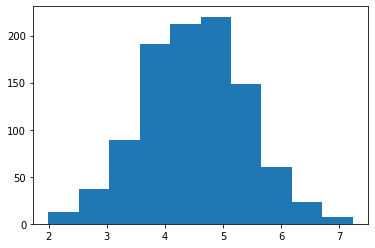

In [5]:
x = []
sum_x = np.zeros(1000)
for i in range(9):
    x.append(np.random.rand(1000))
    sum_x += x[i]
num_bins = 10
n, bins, patches = plt.hist(sum_x, num_bins)

### Задание 3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [6]:
n_true, n_total = 0, 100000
a = np.random.randint(0, 2, n_total)
b = np.random.randint(0, 2, n_total)
c = np.random.randint(0, 2, n_total)
d = np.random.randint(0, 2, n_total)
k = 2 # Кол-во успехов
n = 4 # Кол-во испытаний
x = a + b + c + d
for i in range(0, n_total):
    if x[i] == k:
        n_true += 1
        
coef_C = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))
P = coef_C * 0.5**k * 0.5**(n-k)

print(n_true, n_total , n_true/n_total)
print(P)

37356 100000 0.37356
0.375


### Задание 3.2 Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [7]:
n_true, n_total = 0, 100000
a = np.random.randint(0, 2, n_total)
b = np.random.randint(0, 2, n_total)
c = np.random.randint(0, 2, n_total)
d = np.random.randint(0, 2, n_total)
e = np.random.randint(0, 2, n_total)
f = np.random.randint(0, 2, n_total)
k = 4 # Кол-во успехов
n = 6 # Кол-во испытаний
x = a + b + c + d + e + f
for i in range(0, n_total):
    if x[i] == k:
        n_true += 1
        
coef_C = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))
P = coef_C * 0.5**k * 0.5**(n-k)

print(n_true, n_total , n_true/n_total)
print(P)

23335 100000 0.23335
0.234375


### Задание 4 Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [8]:
for p in itertools.product('01234', repeat=3):
    print(''.join(p))

000
001
002
003
004
010
011
012
013
014
020
021
022
023
024
030
031
032
033
034
040
041
042
043
044
100
101
102
103
104
110
111
112
113
114
120
121
122
123
124
130
131
132
133
134
140
141
142
143
144
200
201
202
203
204
210
211
212
213
214
220
221
222
223
224
230
231
232
233
234
240
241
242
243
244
300
301
302
303
304
310
311
312
313
314
320
321
322
323
324
330
331
332
333
334
340
341
342
343
344
400
401
402
403
404
410
411
412
413
414
420
421
422
423
424
430
431
432
433
434
440
441
442
443
444


In [9]:
for p in itertools.permutations('01234',3):
    print(''.join(str(x) for x in p))

012
013
014
021
023
024
031
032
034
041
042
043
102
103
104
120
123
124
130
132
134
140
142
143
201
203
204
210
213
214
230
231
234
240
241
243
301
302
304
310
312
314
320
321
324
340
341
342
401
402
403
410
412
413
420
421
423
430
431
432


In [10]:
for p in itertools.combinations('01234',3):
    print(''.join(p))

012
013
014
023
024
034
123
124
134
234


### Задание 5 Дополните код расчетом коэффициента корреляции x и y по формуле

0.6828605331704521 0.16045229458665602
0.6828605331704526 0.16045229458665577
Коэф корреляции расчетный - 0.9037680898153831, Коэф корреляции numpy - 0.9037680898153828


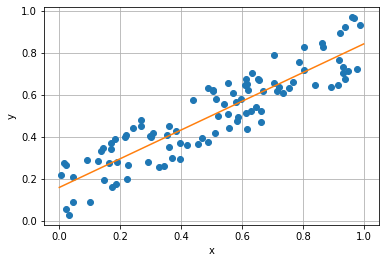

In [11]:
n = 100
r = 0.7
x = np.random.rand(n)
y = r * x + (1 - r) * np.random.rand(n)
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

a = (np.sum(x) * np.sum(y) - n*np.sum(x*y)) / (np.sum(x)*np.sum(x) - n*np.sum(x*x))
b = (np.sum(y) - a*np.sum(x))/n

r = np.sum((x - np.average(x)) * (y - np.average(y))) / np.sqrt(np.sum((x - np.average(x))**2) * np.sum((y - np.average(y))**2))

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y)[0]
print(a, b)
print(a1, b1)
print(f'Коэф корреляции расчетный - {r}, Коэф корреляции numpy - {np.corrcoef(x, y)[1,0]}')
plt.plot([0, 1], [b, a + b])
plt.show()